## Take output of sourmash-tax against GTDB and MMETSP from shotgun metagenomes and metabarcoding data and compare lists of taxa at varying levels of taxonomic resolution

In [1]:
import pandas as pd
import os as os
import glob as glob
import numpy as np
import functools as ft
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

## 01. Compile lists of species and genera observed in shotgun metagenomes

### Function to combine and reformat genus- and species-level data

In [2]:
def compile_taxa_lists(file, sample):
    tax = pd.read_csv(file)
    names = ['query name','rank','fraction','lineage','query_md5','query_filename',
         'f_weighted_at_rank','bp_match_at_rank']
    tax.columns = names
    lineage = tax[['lineage']].copy()
    lineage[['Domain','Phylum','Class','Order','Family','Genus',
             'Species']] = lineage['lineage'].str.split(';', n=7, expand=True)
    euks = lineage.loc[lineage['Domain'] == 'Eukaryota']
    euk_genus = pd.DataFrame(euks['Genus'].unique())
    euk_genus.columns = ['Genus']
    euk_genus = euk_genus.dropna()
    euk_genus['Metagenome_sample'] = sample
    euk_species = pd.DataFrame(euks['Species'].unique())
    euk_species.columns = ['Species']
    euk_species = euk_species.dropna()
    euk_species['Metagenome_sample'] = sample
    return(euk_genus, euk_species)

### Apply function to all samples in a directory

In [10]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/eCruises 2018/Lasker2018/Metagenomes/sourmash/summaries")

In [11]:
df_gen_mgns = []
df_spp_mgns = []

for file in glob.glob('*summarized.csv'):
    a, b = file.split('_S') # Change to characters used for specific data set
    gen, sp = compile_taxa_lists(file, a)
    df_gen_mgns.append(gen)
    df_spp_mgns.append(sp)
    
df_gen_mgns = pd.concat(df_gen_mgns)
df_spp_mgns = pd.concat(df_spp_mgns)

### Assign identifier to dataframe and repeat the process for other data set(s)

In [12]:
df_gen_mgns_Lasker2018 = df_gen_mgns

In [9]:
df_gen_mgns_Flyer2018 = df_gen_mgns

### Combine two dataframes

In [13]:
df_gen_mgns = pd.concat([df_gen_mgns_Lasker2018, df_gen_mgns_Flyer2018], axis=0)
df_gen_mgns

,Genus,Metagenome_sample
1,Bathycoccus,D0079A
2,Micromonas,D0079A
3,Aureococcus,D0079A
4,Pelagomonas,D0079A
5,Emiliania,D0079A
...,...,...
7,Prasinoderma,zr2760_39
8,Pycnococcus,zr2760_39
9,Florenciella,zr2760_39
10,Ostreococcus,zr2760_39


## 02. Compile lists of species and genera observed in 18S metabarcoding data

In [28]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/eCruises 2018/Flyer2018/Metagenomes/sourmash/tax")

### Import and filter ASV table

In [29]:
file = 'Flyer2018_18S_asv_tax_table_noCs_mgnmatches.csv'
asvs = pd.read_csv(file)
asvs = asvs[(asvs['Kingdom'] != 'no_hit') & 
            (asvs['Kingdom'] != 'unassigned')] # Remove ASVs wit 'no_hit' or 'unassigned' in Kingdom
asvs

,lineage,Kingdom,Phylum,Class,Order,Family,Genus,Species,CN18FESPkoa_SC24,CN18FESPkoa_SC26,...,CN18Sc09_2_eDNA,CN18Sc10_2_eDNA,CN18Sc14_2_eDNA,CN18Sc14_8_eDNA,CN18Sc15_2_eDNA,CN18Sc15_8_eDNA,CN18Sc18_2_eDNA,CN18Sc18_8_eDNA,CN18Sc27_2_eDNA,CN18Sc27_8_eDNA
0,Eukaryota;Ctenophora;Tentaculata;Cydippida;Ple...,Eukaryota,Ctenophora,Tentaculata,Cydippida,Pleurobrachiidae,Pleurobrachia,unassigned,31,7,...,7,0,8,9,4,6,7,0,3,2
1,Eukaryota;Cnidaria;Hydrozoa;Leptothecata;Mitro...,Eukaryota,Cnidaria,Hydrozoa,Leptothecata,Mitrocomidae,Halopsis,s_,3,0,...,3,1,0,2,1,0,2,0,0,1
2,Eukaryota;Cnidaria;Hydrozoa;Siphonophorae;unas...,Eukaryota,Cnidaria,Hydrozoa,Siphonophorae,unassigned,unassigned,unassigned,0,0,...,17,12,52,2,9,0,110,2,418,0
3,Eukaryota;Arthropoda;Hexanauplia;Calanoida;Met...,Eukaryota,Arthropoda,Hexanauplia,Calanoida,Metridinidae,Metridia,unassigned,4,0,...,5,1,4,1,3,2091,2,1268,2,1
4,Eukaryota;Bacillariophyta;Coscinodiscophyceae;...,Eukaryota,Bacillariophyta,Coscinodiscophyceae,Thalassiosirales,Thalassiosiraceae,Thalassiosira,unassigned,1220,115,...,67,42,109,90,13,3817,26,141,19,452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,Eukaryota;Dinoflagellata;Dinophyceae;Coccidini...,Eukaryota,Dinoflagellata,Dinophyceae,Coccidiniales,Chytriodiniaceae,Chytriodinium,s_,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,Eukaryota;unknown;unknown;Bicosoecida;unassign...,Eukaryota,unknown,unknown,Bicosoecida,unassigned,g_,s_,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,Eukaryota;Platyhelminthes;Monogenea;Mazocraeid...,Eukaryota,Platyhelminthes,Monogenea,Mazocraeidea,Mazocraeidae,Mazocraeoides,Mazocraeoides prashadi,0,0,...,0,0,0,0,0,0,0,0,0,0
8338,Eukaryota;Apicomplexa;Conoidasida;Eucoccidiori...,Eukaryota,Apicomplexa,Conoidasida,Eucoccidiorida,Eimeriidae,g_,s_,0,0,...,0,0,0,0,0,0,0,0,0,0


### Function to reformat taxa lists

In [30]:
def reformat_ASV_table(df, taxon_to_drop):
    samples = [col for col in df.columns if 'CN18' in col] # Change 'CN18' to some identifier in all sample names
    cols_to_drop = ['lineage','Kingdom','Phylum','Class','Order','Family',taxon_to_drop]
    df = df.drop(cols_to_drop, axis=1)
    taxon = [x for x in df.columns if 'CN18' not in x] # Change 'CN18' to some identifier in all sample names
    df_melt = pd.melt(df, id_vars=taxon, value_vars=samples)
    df_melt = df_melt.rename(columns = {'variable':'ASV_sample', 
                                                    'value':'Read count'})
    mask = ['g_', 's_', 'unknown', 'unassigned'] # identify ASVs where taxon is unknown or unassigned
    taxon = ''.join(taxon) # Convert list to string
    df_asvs = df_melt.loc[~df_melt[taxon].isin(mask), :]
    df_asvs = df_asvs[df_asvs['Read count'] != 0]
    df_asvs = df_asvs.drop(['Read count'], axis=1)
    df_asvs = df_asvs.drop_duplicates()
    return(df_asvs)

In [31]:
df_gen_asvs = reformat_ASV_table(asvs, 'Species')
df_gen_asvs

,Genus,ASV_sample
0,Pleurobrachia,CN18FESPkoa_SC24
1,Halopsis,CN18FESPkoa_SC24
3,Metridia,CN18FESPkoa_SC24
4,Thalassiosira,CN18FESPkoa_SC24
5,Ensiculifera,CN18FESPkoa_SC24
...,...,...
451410,Prymnesium,CN18Sc27_8_eDNA
451510,Penicillium,CN18Sc27_8_eDNA
451818,Haslea,CN18Sc27_8_eDNA
451909,Hemiselmis,CN18Sc27_8_eDNA


In [32]:
df_spp_asvs = reformat_ASV_table(asvs, 'Genus')
df_spp_asvs

,Species,ASV_sample
5,Ensiculifera imariensis,CN18FESPkoa_SC24
6,Dinophyceae sp. CCMP1878,CN18FESPkoa_SC24
14,Acantharian sp. 6201,CN18FESPkoa_SC24
25,uncultured marine picoeukaryote,CN18FESPkoa_SC24
27,Chaetoceros debilis,CN18FESPkoa_SC24
...,...,...
451891,Pentapharsodinium tyrrhenicum,CN18Sc27_8_eDNA
451952,Eutintinnus cf. apertus,CN18Sc27_8_eDNA
452053,Incisomonas marina,CN18Sc27_8_eDNA
452457,Pirsonia guinardiae,CN18Sc27_8_eDNA


### Assign identifier to dataframe and repeat the process for other data set(s)

In [27]:
df_gen_asvs_Lasker = df_gen_asvs

In [33]:
df_gen_asvs_Flyer = df_gen_asvs

### Combine two dataframes

In [34]:
df_gen_asvs = pd.concat([df_gen_asvs_Lasker, df_gen_asvs_Flyer], axis=0)
df_gen_asvs

,Genus,ASV_sample
0,Paracalanus,Lasker18Sc122_3_D0052
3,Ensiculifera,Lasker18Sc122_3_D0052
7,Akashiwo,Lasker18Sc122_3_D0052
8,Cochlodinium,Lasker18Sc122_3_D0052
9,Metridia,Lasker18Sc122_3_D0052
...,...,...
451410,Prymnesium,CN18Sc27_8_eDNA
451510,Penicillium,CN18Sc27_8_eDNA
451818,Haslea,CN18Sc27_8_eDNA
451909,Hemiselmis,CN18Sc27_8_eDNA


## 03. Extract taxa common to both data sets and taxa unique to one data set

### To get genera present in both sheets

In [35]:
genera_same = pd.merge(df_gen_mgns, df_gen_asvs, how = 'inner', on = ['Genus'])
genera_same

,Genus,Metagenome_sample,ASV_sample
0,Bathycoccus,D0079A,Lasker18Sc122_5_D0053
1,Bathycoccus,D0079A,Lasker18Sc122_17_D0057
2,Bathycoccus,D0079A,Lasker18Sc122_19_D0058
3,Bathycoccus,D0079A,Lasker18Sc123_5_D0064
4,Bathycoccus,D0079A,Lasker18Sc124_17_D0078
...,...,...,...
81890,Rhizosolenia,D0163A,CN18Sc15_8_eDNA
81891,Rhizosolenia,D0163A,CN18Sc18_2_eDNA
81892,Rhizosolenia,D0163A,CN18Sc18_8_eDNA
81893,Rhizosolenia,D0163A,CN18Sc27_2_eDNA


### To get genera only in one sheet or another

In [36]:
common = df_gen_mgns.merge(df_gen_asvs, on=['Genus'])

#### Present only in metagenomes

In [37]:
df_gen_mgns[(~df_gen_mgns.Genus.isin(common.Genus))]

,Genus,Metagenome_sample
4,Pelagomonas,D0079A
5,Emiliania,D0079A
9,Isochrysis,D0079A
12,Ostreococcus,D0079A
13,Pycnococcus,D0079A
...,...,...
14,Gephyrocapsa,zr2760_28
3,Pelagomonas,zr2760_39
5,Emiliania,zr2760_39
8,Pycnococcus,zr2760_39


#### Present only in amplicons

In [38]:
df_gen_asvs[(~df_gen_asvs.Genus.isin(common.Genus))]

,Genus,ASV_sample
0,Paracalanus,Lasker18Sc122_3_D0052
3,Ensiculifera,Lasker18Sc122_3_D0052
7,Akashiwo,Lasker18Sc122_3_D0052
8,Cochlodinium,Lasker18Sc122_3_D0052
9,Metridia,Lasker18Sc122_3_D0052
...,...,...
451323,Mataza,CN18Sc27_8_eDNA
451410,Prymnesium,CN18Sc27_8_eDNA
451510,Penicillium,CN18Sc27_8_eDNA
451818,Haslea,CN18Sc27_8_eDNA


## 04. Extract taxa seen only in one of the two paired samples

In [39]:
os.chdir("/Users/nastassia.patin/Desktop/Projects/eCruises_TIMESERIES/Euks-mgns-asvs")

#### Load file showing paired sample names and turn pairs into a dictionary

In [40]:
file = 'eCruises2018_mgn_asv_paired_samples.csv'
pairs = pd.read_csv(file)

#### Add paired sample names to ASV and metagenome genus lists

In [41]:
df_gen_asvs_paired = df_gen_asvs.merge(pairs, how='left', on='ASV_sample')
df_gen_mgns_paired = df_gen_mgns.merge(pairs, how='left', on='Metagenome_sample')
df_gen_asvs_paired

,Genus,ASV_sample,Metagenome_sample
0,Paracalanus,Lasker18Sc122_3_D0052,D0052A
1,Ensiculifera,Lasker18Sc122_3_D0052,D0052A
2,Akashiwo,Lasker18Sc122_3_D0052,D0052A
3,Cochlodinium,Lasker18Sc122_3_D0052,D0052A
4,Metridia,Lasker18Sc122_3_D0052,D0052A
...,...,...,...
14519,Prymnesium,CN18Sc27_8_eDNA,zr2760_70
14520,Penicillium,CN18Sc27_8_eDNA,zr2760_70
14521,Haslea,CN18Sc27_8_eDNA,zr2760_70
14522,Hemiselmis,CN18Sc27_8_eDNA,zr2760_70


#### Extract genera seen in all ASV samples, with or without matching pair

In [42]:
df_gen_asvs_total = df_gen_asvs_paired.merge(df_gen_mgns_paired, how='left', 
                                            on=['Genus', 'ASV_sample']).drop(columns=['Metagenome_sample_x'])
df_gen_asvs_total

,Genus,ASV_sample,Metagenome_sample_y
0,Paracalanus,Lasker18Sc122_3_D0052,NaN
1,Ensiculifera,Lasker18Sc122_3_D0052,NaN
2,Akashiwo,Lasker18Sc122_3_D0052,NaN
3,Cochlodinium,Lasker18Sc122_3_D0052,NaN
4,Metridia,Lasker18Sc122_3_D0052,NaN
...,...,...,...
14519,Prymnesium,CN18Sc27_8_eDNA,NaN
14520,Penicillium,CN18Sc27_8_eDNA,NaN
14521,Haslea,CN18Sc27_8_eDNA,NaN
14522,Hemiselmis,CN18Sc27_8_eDNA,NaN


#### Extract genera seen in all metagenome samples, with or without matching pair

In [43]:
df_gen_mgns_total = df_gen_mgns_paired.merge(df_gen_asvs_paired, how='left', 
                                            on=['Genus', 'Metagenome_sample']).drop(columns=['ASV_sample_x'])
df_gen_mgns_total

,Genus,Metagenome_sample,ASV_sample_y
0,Bathycoccus,D0079A,Lasker18Sc124_19_D0079
1,Micromonas,D0079A,Lasker18Sc124_19_D0079
2,Aureococcus,D0079A,Lasker18Sc124_19_D0079
3,Pelagomonas,D0079A,NaN
4,Emiliania,D0079A,NaN
...,...,...,...
1799,Prasinoderma,zr2760_39,CN18FESPkoa_SC57
1800,Pycnococcus,zr2760_39,NaN
1801,Florenciella,zr2760_39,NaN
1802,Ostreococcus,zr2760_39,NaN


#### Extract genera seen ONLY in matched sample pairs

In [44]:
df_gen_pairmatches = df_gen_mgns_paired.merge(df_gen_asvs_paired, how='inner', 
                                            on=['Genus', 'ASV_sample', 'Metagenome_sample'])
df_gen_pairmatches

,Genus,Metagenome_sample,ASV_sample
0,Bathycoccus,D0079A,Lasker18Sc124_19_D0079
1,Micromonas,D0079A,Lasker18Sc124_19_D0079
2,Aureococcus,D0079A,Lasker18Sc124_19_D0079
3,Bolidomonas,D0079A,Lasker18Sc124_19_D0079
4,Chrysochromulina,D0079A,Lasker18Sc124_19_D0079
...,...,...,...
843,Minutocellus,zr2760_39,CN18FESPkoa_SC57
844,Micromonas,zr2760_39,CN18FESPkoa_SC57
845,Phaeocystis,zr2760_39,CN18FESPkoa_SC57
846,Prasinoderma,zr2760_39,CN18FESPkoa_SC57


#### Extract taxa only seen in ASV or metagenome sample of each pair

In [45]:
# Subtract the pair-matched taxa df from the df of all ASV taxa
df_gen_asvs_total = df_gen_asvs_total.rename(columns={'Metagenome_sample_y':'Metagenome_sample'})
df_gen_asvs_only = pd.concat([df_gen_asvs_total, 
                                    df_gen_pairmatches, 
                                    df_gen_pairmatches]).drop_duplicates(keep=
                                                           False)
df_gen_asvs_only

,Genus,ASV_sample,Metagenome_sample
0,Paracalanus,Lasker18Sc122_3_D0052,NaN
1,Ensiculifera,Lasker18Sc122_3_D0052,NaN
2,Akashiwo,Lasker18Sc122_3_D0052,NaN
3,Cochlodinium,Lasker18Sc122_3_D0052,NaN
4,Metridia,Lasker18Sc122_3_D0052,NaN
...,...,...,...
14519,Prymnesium,CN18Sc27_8_eDNA,NaN
14520,Penicillium,CN18Sc27_8_eDNA,NaN
14521,Haslea,CN18Sc27_8_eDNA,NaN
14522,Hemiselmis,CN18Sc27_8_eDNA,NaN


In [46]:
# Subtract the pair-matched taxa df from the df of all metagenome taxa
df_gen_mgns_total = df_gen_mgns_total.rename(columns={'ASV_sample_y':'ASV_sample'})
df_gen_mgns_only = pd.concat([df_gen_mgns_total, 
                                    df_gen_pairmatches, 
                                    df_gen_pairmatches]).drop_duplicates(keep=
                                                           False)
df_gen_mgns_only

,Genus,Metagenome_sample,ASV_sample
3,Pelagomonas,D0079A,NaN
4,Emiliania,D0079A,NaN
8,Isochrysis,D0079A,NaN
11,Ostreococcus,D0079A,NaN
12,Pycnococcus,D0079A,NaN
...,...,...,...
1795,Pelagomonas,zr2760_39,NaN
1797,Emiliania,zr2760_39,NaN
1800,Pycnococcus,zr2760_39,NaN
1801,Florenciella,zr2760_39,NaN


#### Group and count taxa seen in all three data sets: for each sample pair, (a) only in ASV sample, (b) only in metagenome sample, (c) in both 

In [47]:
dfs = [df_gen_pairmatches, df_gen_mgns_only, df_gen_asvs_only]
names = ['df_gen_pairmatches', 'df_gen_mgns_only', 'df_gen_asvs_only']

In [48]:
def group_count_taxa(df, name):
    dfs_counts[name + '_counts'] = df.groupby(['Genus']).count()
    return(dfs_counts)

In [49]:
dfs_counts = {}
for i in range(0,3):
    dfs_counts = group_count_taxa(dfs[i], names[i])

In [50]:
df_gen_pairmatches_counts = dfs_counts['df_gen_pairmatches_counts'].rename(columns=
                                                                           {'ASV_sample':'Pair matched'}).drop(columns=
                                                                                                               'Metagenome_sample')

In [51]:
df_gen_mgns_only_counts = dfs_counts['df_gen_mgns_only_counts'].rename(columns=
                                                                       {'Metagenome_sample':'Metagenome only'}).drop(columns=
                                                                                                                     'ASV_sample')

In [52]:
df_gen_asvs_only_counts = dfs_counts['df_gen_asvs_only_counts'].rename(columns=
                                                                       {'ASV_sample':'ASV only'}).drop(columns=
                                                                                                       'Metagenome_sample')

#### Combine all three data sets: for each sample pair, which taxa were seen (a) only in the ASV sample, (b) only in the metagenome sample, or (c) in both

In [53]:
dfs = [df_gen_pairmatches_counts, df_gen_mgns_only_counts, df_gen_asvs_only_counts]

In [54]:
df_three = ft.reduce(lambda left, right: pd.merge(left, 
                                                  right, 
                                                  left_index=True, 
                                                  right_index=True,
                                                 how='outer'),
                    dfs).reset_index().fillna(0)
df_three

,Genus,Pair matched,Metagenome only,ASV only
0,Abatus,0.0,0.0,13.0
1,Abollifer,0.0,0.0,32.0
2,Acanthamoeba,0.0,0.0,11.0
3,Acanthocolla,0.0,0.0,4.0
4,Acanthoeca,0.0,0.0,31.0
...,...,...,...,...
474,Wallemia,0.0,0.0,1.0
475,Warnowia,0.0,0.0,110.0
476,Wickerhamiella,0.0,0.0,3.0
477,Xystonella,0.0,0.0,6.0


#### Format for plotting

In [55]:
df_final = pd.melt(df_three, id_vars=['Genus'], 
                   value_vars=['ASV only', 'Metagenome only', 'Pair matched']).fillna(0).rename(columns=
                                                                                                    {'variable':'Observation group', 
                                                                                                     'value':'Count'}).sort_values(by='Genus')
df_final

,Genus,Observation group,Count
0,Abatus,ASV only,13.0
958,Abatus,Pair matched,0.0
479,Abatus,Metagenome only,0.0
1,Abollifer,ASV only,32.0
959,Abollifer,Pair matched,0.0
...,...,...,...
477,Xystonella,ASV only,6.0
956,Xystonella,Metagenome only,0.0
957,Zschokkella,Metagenome only,0.0
478,Zschokkella,ASV only,1.0


#### Stacked bar plot of all genera in all samples

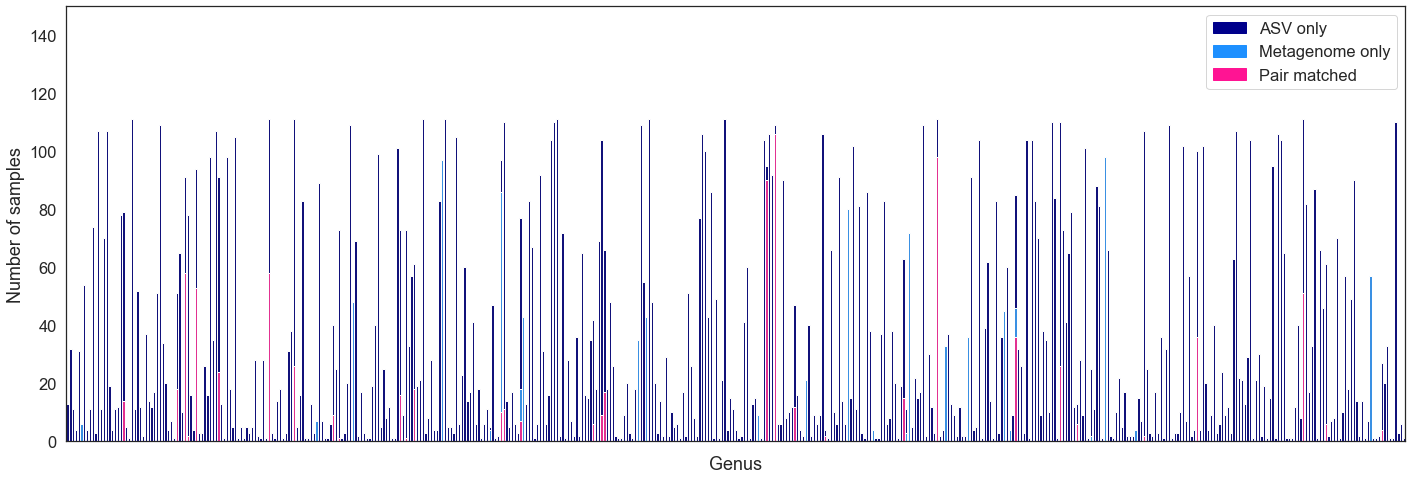

In [80]:
plt.figure(figsize=(24,8))
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette(sns.color_palette('colorblind'))

# top bar -> sum all values(ASV only, pair matched, and metagenome only) to find y position of the bars
total = df_final.groupby('Genus')['Count'].sum().reset_index()

# bar chart 1 -> top bars (total counts)
bar1 = sns.barplot(x="Genus",  y="Count", data=total, color='darkblue', alpha=1)

# bottom bar 1 ->  take only metagenome-only values from the data
mgns = df_final[df_final['Observation group']=='Metagenome only']

# bar chart 2 -> bottom bars (group of 'Metagenome only')
bar2 = sns.barplot(x="Genus",  y="Count", data=mgns, color='dodgerblue', alpha=1) # estimator=sum, ci=None,  

# bottom bar 2 ->  take only pair matched samples
pairs = df_final[df_final['Observation group']=='Pair matched']

# bar chart 3 -> bottom bars (pair matched samples)
bar3 = sns.barplot(x="Genus",  y="Count", data=pairs, color='deeppink', alpha=1) # estimator=sum, ci=None,  

# add legend
top_bar = mpatches.Patch(color='darkblue', label='ASV only')
middle_bar = mpatches.Patch(color='dodgerblue', label='Metagenome only')
bottom_bar = mpatches.Patch(color='deeppink', label='Pair matched')

plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.ylabel("Number of samples", size=18)
bar1.set_xticklabels([])
plt.xlabel("Genus", size=18)

plt.ylim(0, 150)
plt.savefig('eCruises2018_genera_metagenomes_ASVs_bars_ALL_stacked.svg', format='svg', dpi=1200, bbox_inches='tight')

### Split the entire df into smaller ones

#### First look at all taxa with any pair matching

In [81]:
df_subset_highpairmatches = df_final[(df_final['Observation group'] == 'Pair matched') &
                     (df_final['Count'] > 0)]
genus_a = df_subset_highpairmatches['Genus']
df_final_a = df_final[df_final['Genus'].isin(genus_a)]

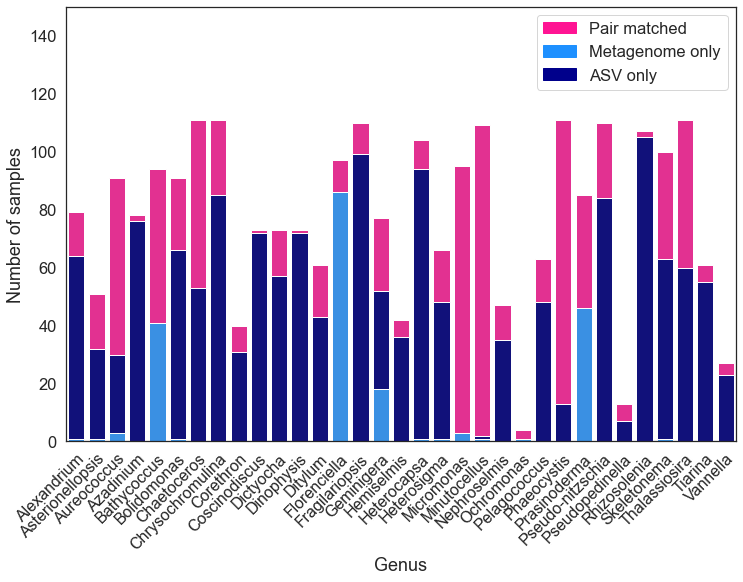

In [86]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
sns.set_style('white')

# top bar -> sum all values(ASV only, pair matched, and metagenome only) to find y position of the bars
total = df_final_a.groupby('Genus')['Count'].sum().reset_index()

# bar chart 1 -> top bars (total counts)
bar1 = sns.barplot(x="Genus",  y="Count", data=total, color='deeppink', alpha=1)

# bottom bar 1 ->  take only metagenome-only values from the data
mgns = df_final_a[df_final_a['Observation group']=='ASV only']

# bar chart 2 -> bottom bars (group of 'Metagenome only')
bar2 = sns.barplot(x="Genus",  y="Count", data=mgns, color='darkblue', alpha=1) # estimator=sum, ci=None,  

# bottom bar 2 ->  take only pair matched samples
pairs = df_final_a[df_final_a['Observation group']=='Metagenome only']

# bar chart 3 -> bottom bars (pair matched samples)
bar3 = sns.barplot(x="Genus",  y="Count", data=pairs, color='dodgerblue', alpha=1) # estimator=sum, ci=None,  

# add legend
top_bar = mpatches.Patch(color='darkblue', label='ASV only')
middle_bar = mpatches.Patch(color='dodgerblue', label='Metagenome only')
bottom_bar = mpatches.Patch(color='deeppink', label='Pair matched')

plt.legend(handles=[bottom_bar, middle_bar, top_bar])

plt.ylabel("Number of samples", size=18)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor',
                    size=16)
plt.xlabel("Genus", size=18)
plt.ylim(0, 150)

plt.savefig('eCruises2018_genera_metagenomes_18S_bars_pairmatches_stacked.svg', 
            format='svg', dpi=1200, bbox_inches='tight')

#### Genera with high levels of ASV-only observations

In [56]:
df_subset_highasvonly = df_final[(df_final['Observation group'] == 'ASV only') &
                     (df_final['Count'] > 40)]
genus_b = df_subset_highasvonly['Genus']
df_final_b = df_final[df_final['Genus'].isin(genus_b)]

#### Stacked bar plot

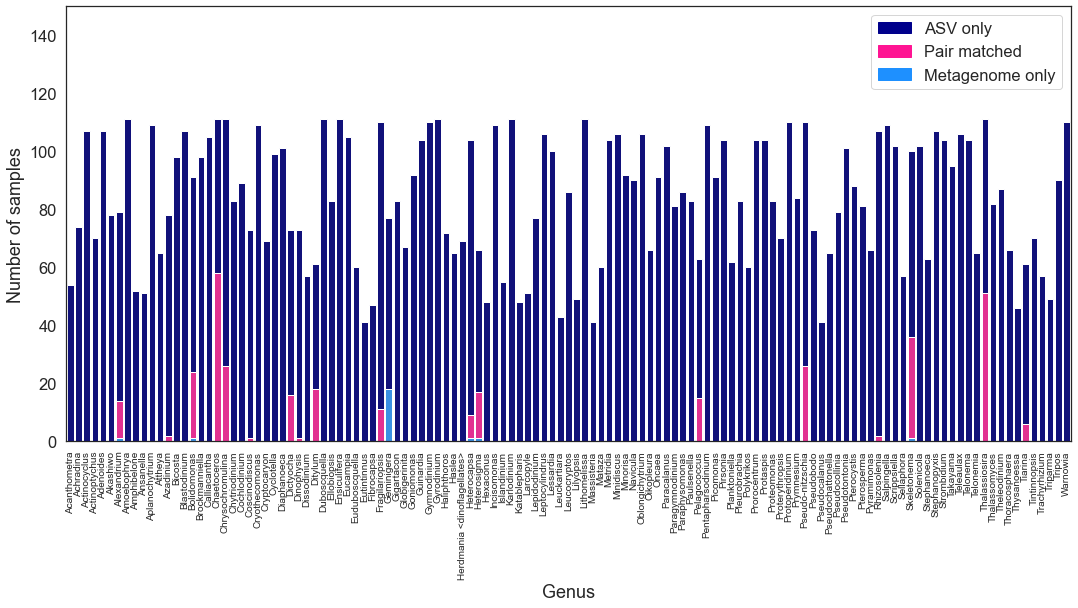

In [59]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette(sns.color_palette('colorblind'))

# top bar -> sum all values(ASV only, pair matched, and metagenome only) to find y position of the bars
total = df_final_b.groupby('Genus')['Count'].sum().reset_index()

# bar chart 1 -> top bars (total counts)
bar1 = sns.barplot(x="Genus",  y="Count", data=total, color='darkblue', alpha=1)

# bottom bar 1 ->  take only metagenome-only values from the data
mgns = df_final_b[df_final_b['Observation group']=='Pair matched']

# bar chart 2 -> bottom bars (group of 'Metagenome only')
bar2 = sns.barplot(x="Genus",  y="Count", data=mgns, color='deeppink', alpha=1) # estimator=sum, ci=None,  

# bottom bar 2 ->  take only pair matched samples
pairs = df_final_b[df_final_b['Observation group']=='Metagenome only']

# bar chart 3 -> bottom bars (pair matched samples)
bar3 = sns.barplot(x="Genus",  y="Count", data=pairs, color='dodgerblue', alpha=1) # estimator=sum, ci=None,  

# add legend
top_bar = mpatches.Patch(color='darkblue', label='ASV only')
middle_bar = mpatches.Patch(color='deeppink', label='Pair matched')
bottom_bar = mpatches.Patch(color='dodgerblue', label='Metagenome only')

plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.ylabel("Number of samples", size=18)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=90, size=10)
plt.ylim(0, 150)
plt.savefig('eCruises2018_genera_metagenomes_18S_bars_highasvsonly_stacked.svg', 
            format='svg', dpi=1200, bbox_inches='tight')

#### Genera with any metagenome-only observations

In [91]:
df_subset_highmgnonly = df_final[(df_final['Observation group'] == 'Metagenome only') &
                     (df_final['Count'] > 0)]
genus_c = df_subset_highmgnonly['Genus']
df_final_c = df_final[df_final['Genus'].isin(genus_c)]

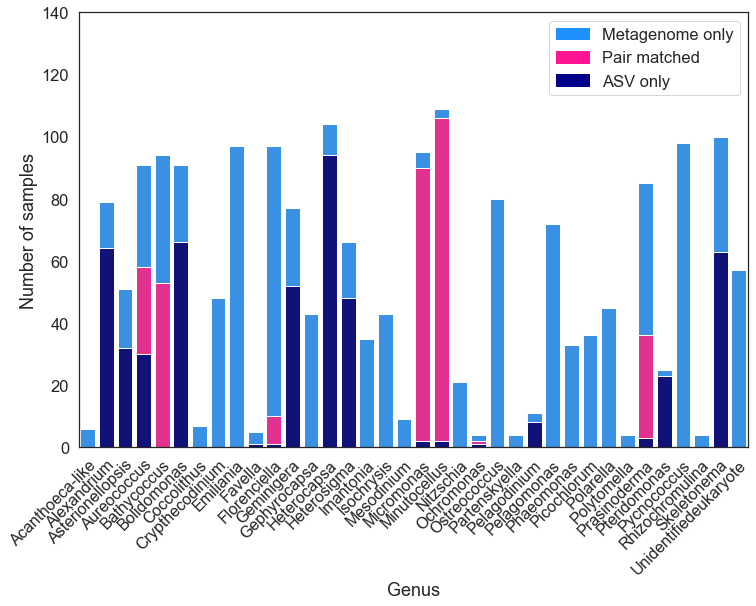

In [94]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.5)
sns.set_style('white')

# top bar -> sum all values(ASV only, pair matched, and metagenome only) to find y position of the bars
total = df_final_c.groupby('Genus')['Count'].sum().reset_index()

# bar chart 1 -> top bars (total counts)
bar1 = sns.barplot(x="Genus",  y="Count", data=total, color='dodgerblue', alpha=1)

# bottom bar 1 ->  take only metagenome-only values from the data
mgns = df_final_c[df_final_c['Observation group']=='Pair matched']

# bar chart 2 -> bottom bars (group of 'Metagenome only')
bar2 = sns.barplot(x="Genus",  y="Count", data=mgns, color='deeppink', alpha=1) # estimator=sum, ci=None,  

# bottom bar 2 ->  take only pair matched samples
pairs = df_final_c[df_final_c['Observation group']=='ASV only']

# bar chart 3 -> bottom bars (pair matched samples)
bar3 = sns.barplot(x="Genus",  y="Count", data=pairs, color='darkblue', alpha=1) # estimator=sum, ci=None,  

# add legend
top_bar = mpatches.Patch(color='dodgerblue', label='Metagenome only')
middle_bar = mpatches.Patch(color='deeppink', label='Pair matched')
bottom_bar = mpatches.Patch(color='darkblue', label='ASV only')

plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.ylabel("Number of samples", size=18)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor',
                    size=16)
plt.ylim(0, 140)
plt.savefig('eCruises2018_genera_metagenomes_18S_bars_mgnsonly_stacked.svg', 
            format='svg', dpi=1200, bbox_inches='tight')

### Make histograms of number of genera in each observation group

#### Without y-axis break

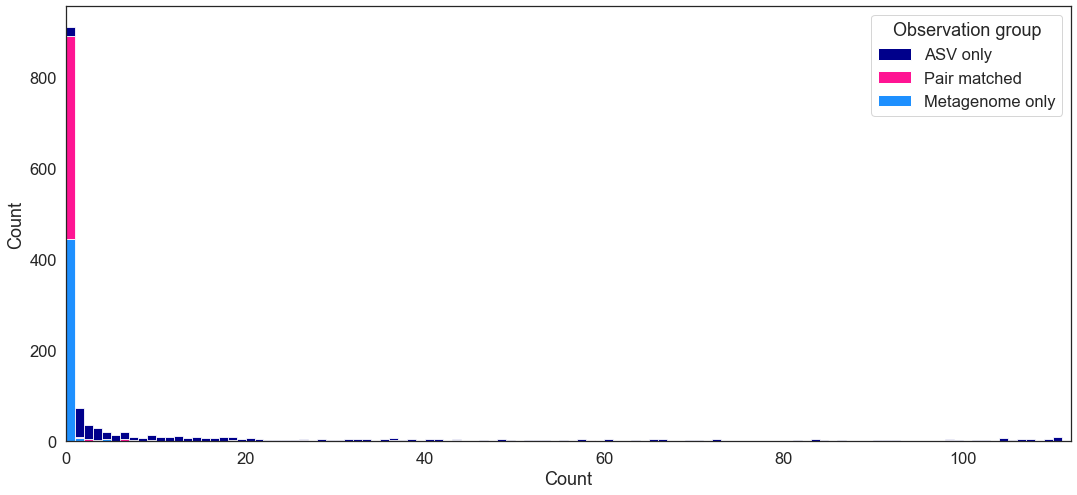

In [95]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette(['darkblue','deeppink','dodgerblue'])

ax = sns.histplot(data=df_final, x='Count', hue='Observation group', 
                    alpha=1.0, binwidth=1, multiple='stack')

ax.set_xlim(0, 112)

plt.show()

#### With y-axis break

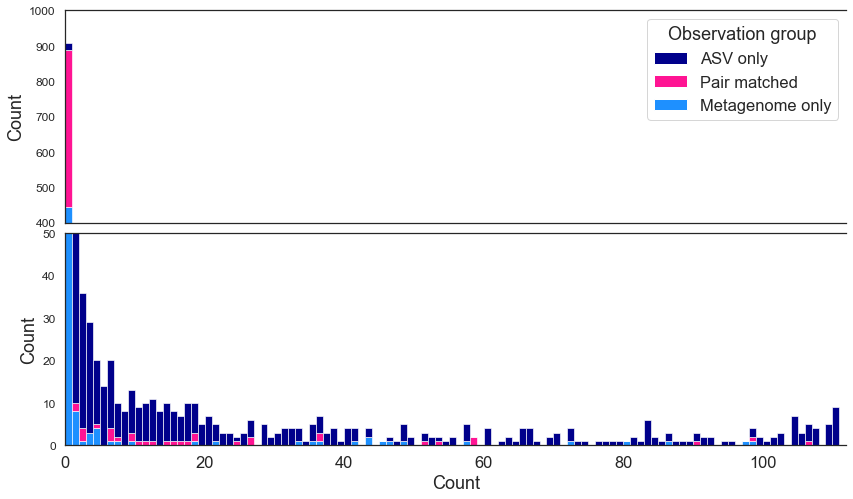

In [98]:
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette(['darkblue','deeppink','dodgerblue'])

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(14,8))
ax = sns.histplot(data=df_final, x='Count', hue='Observation group', 
                    alpha=1.0, binwidth=1, ax=ax1, multiple='stack')
ax = sns.histplot(data=df_final, x='Count', hue='Observation group', 
                    alpha=1.0, binwidth=1, ax=ax2, multiple='stack')
sns.despine(right=True, top=False) # , left = True
ax1.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.legend([],[], frameon=False)

ax1.set_ylim(400, 1000)
ax2.set_ylim(0, 50)
ax1.set_xlim(0, 112)
plt.subplots_adjust(wspace=0, hspace=0.05)

In [99]:
f.savefig('eCruises2018_genera_metagenomes_18S_histogram.svg', format='svg', dpi=1200, bbox_inches='tight')